## Independent Data Exploration

You can either use this notebook directly or add the contents of this notebook to your own project notebook named `exploration.ipynb`. The following cell is required to submit.

In [ ]:
# Run this cell to 
# - create necessary support files, 
# - check that your exploration is formatted correctly, 
# - and submit your work to OK.

ok_spec = """
{
  "name": "Independent Data Exploration",
  "endpoint": "cal/data8/sp17/exploration",
  "src": [
    "exploration.ipynb"
  ],
  "tests": {},
  "protocols": [
      "file_contents",
      "backup"
  ]
}    
"""
    
ok_test = '''
test = {
  'name': 'Check file name',
  'points': 1,
  'suites': [
    {
      'cases': [
        {
          'code': r"""
          >>> # Make sure that you name your submission file exploration.ipynb
          >>> import os
          >>> os.path.exists('exploration.ipynb')
          True
          """,
          'hidden': False,
          'locked': False
        },
      ],
      'scored': True,
      'setup': '',
      'teardown': '',
      'type': 'doctest'
    }
  ]
}
'''
    
import os
    
if not os.path.exists('exploration.ok'):
    with open('exploration.ok', 'w') as out:
        out.write(ok_spec)

if not os.path.exists('tests/q1.py'):
    with open('tests/q1.py', 'w') as out:
        out.write(ok_test)
    
from client.api.notebook import Notebook
ok = Notebook('exploration.ok')
ok.auth(inline=True)
ok.grade('q1')
_ = ok.submit()

Assignment: Independent Data Exploration
OK, version v1.9.5

Successfully logged in as mattholtzer9@berkeley.edu
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... 

In [78]:
#Standard imports
#Not really sure what they do

from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [4]:
#Import datasets

#2015 data on colleges
scorecard = Table.read_table("Most-Recent-Cohorts-Scorecard-Elements.csv").select("INSTNM", "CITY", "STABBR", "SATVR25", "SATVR75", "SATMT25", "SATMT75")

#All the state capitals in alphabetical order
statecaps = Table.read_table("usgs_state_2000.csv").column("State")

#Makes table with 2001-2002 spending per year per student
education = Table.read_table("tabn194.csv").with_column("State", statecaps).select("State", "2001-02")
intformat = [int(x.replace("," , "")) for x in education.column(1)]
education = education.with_column("$ Per Student", intformat).drop(1)

**DESCRIBE DATA**

In [79]:
education

State,$ Per Student
AL,6327
AK,10419
AZ,6470
AR,6676
CA,7439
CO,7284
CT,11022
DE,9959
DC,14557
FL,6679


In [6]:
np.average(education.column("$ Per Student"))

8315.254901960785

In [7]:
np.std(education.column("$ Per Student"))

1790.6059314354056

In [8]:
min(education.column("$ Per Student"))

5294

In [9]:
max(education.column("$ Per Student"))

14557

In [10]:
len(education.column(1))

51

**Description of table**: This table contains two columns, one indicating a categorical variable for the state abbreviation, and a second column that contains the quantitative variable average dollar spent on education per student in the school year from 2001-2002. I am using the 2001-2002 numbers because I want to try and look at the effects of school spending at a young age on students much farther down the road. Students who would have entered college in 2015 would be around the age of kindergarden/pre-k in the 2001-2002 school year.

**Description of variables**: The state abbreviation is an unimportant variable in this table since there is simply one instance for every single state. Dollar Per Student on the other hand is very important and has these characteristics. It has an average of 8,315.25, a minimum of 5,294, a maximum of 14,557, a standard deviation of 1,790.61, and 51 values (one for every state plus the District of Columbia)

In [81]:
#resetting scorecard to only contain rows that have SAT scores for math and reading and are from states in the education table
scorecard = scorecard.where("SATVR25", are.above(1)).where("SATMT25", are.above(1)).where("STABBR", are.contained_in(statecaps))
scorecard

INSTNM,CITY,STABBR,SATVR25,SATVR75,SATMT25,SATMT75
Alabama A & M University,Normal,AL,377,470,370,470
University of Alabama at Birmingham,Birmingham,AL,500,640,490,640
University of Alabama in Huntsville,Huntsville,AL,520,670,530,650
Alabama State University,Montgomery,AL,380,470,380,480
The University of Alabama,Tuscaloosa,AL,490,620,500,630
Auburn University at Montgomery,Montgomery,AL,433,538,468,550
Auburn University,Auburn,AL,520,630,530,645
Birmingham Southern College,Birmingham,AL,500,620,500,620
Concordia College Alabama,Selma,AL,320,520,200,600
Huntingdon College,Montgomery,AL,460,560,450,530


In [82]:
len(scorecard.column(0))

1189

In [83]:
np.average(scorecard.column("SATVR75"))

577.0033641715728

In [84]:
np.average(scorecard.column("SATMT75"))

585.33389402859541

In [85]:
np.average(abs(scorecard.column("SATMT75")-scorecard.column("SATVR75")))

21.728343145500421

In [86]:
np.average(scorecard.column("SATVR25"))

468.39865433137089

In [87]:
np.average(scorecard.column("SATMT25"))

476.06391925988225

In [88]:
np.average(abs(scorecard.column("SATMT25")-scorecard.column("SATVR25")))

19.101766190075693

In [89]:
min(scorecard.column("SATVR25"))

265.0

In [90]:
min(scorecard.column("SATMT25"))

200.0

In [91]:
max(scorecard.column("SATVR75"))

800.0

In [92]:
max(scorecard.column("SATMT75"))

800.0

In [93]:
np.std(scorecard.column("SATMT75"))

74.368405597476155

In [94]:
np.std(scorecard.column("SATMT25"))

75.534067874717834

In [95]:
np.std(scorecard.column("SATVR25"))

69.308084874503251

In [96]:
np.std(scorecard.column("SATVR75"))

70.607516251259227

**Description of table**: This table contains data pertaining to 1,189 colleges and their incoming classes in the year 2015. The first column is a categorical variable containing the name of the university. The second column is a categorical variable containing the name of the city in which the university resides. The third column is a categorical variable for state abbreviation in which the college resides. The fourth column is a quantitative variable for the 25th percentile for SAT Reading score for incoming students at that school while the fifth is the 75th. The same goes for column six and seven instead they represent scores on the SAT Math Section.

**Description of variables**: The average 75th percentile for reading is 577 while the average 75th percentile for math is 585 while the average absolute value difference between the two is only 21.7. A similar relationship holds for the 25th percentile but at 100 points lower. The minimum Reading 25th percentile is 265 while the minimum Math 25th percentile is 200 and the max 75th percentile for both is 800. Since 200 is the minimum score on the SAT and 800 is the max that means there is at least one school with more than 25% perfect scores on both sections and 25% perfect fails on math. The standard deviation for all the percentiles is around 70.

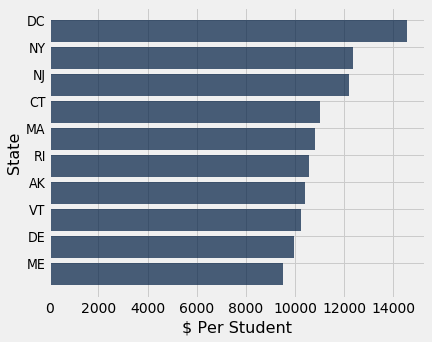

In [97]:
#Visualize quantatative variables

education.sort("$ Per Student", descending = True).take(np.arange(0,10)).barh("State")

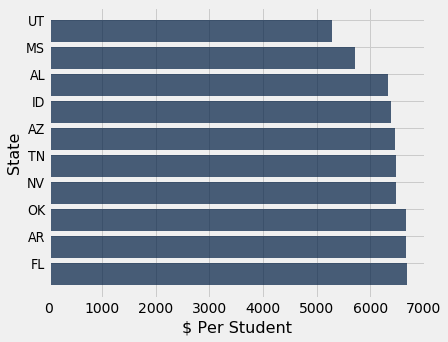

In [98]:
education.sort("$ Per Student").take(np.arange(0,10)).barh("State")

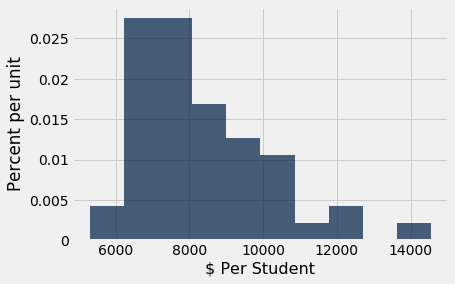

In [99]:
education.hist("$ Per Student")

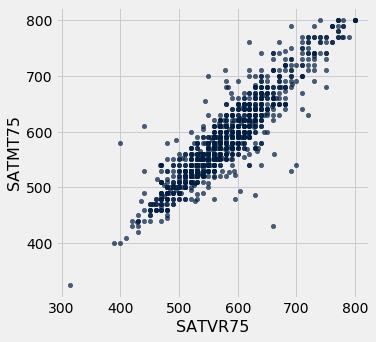

In [100]:
scorecard.scatter("SATVR75", "SATMT75")

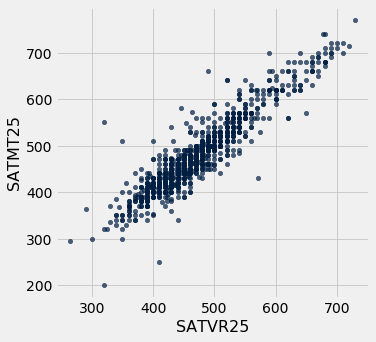

In [101]:
scorecard.scatter("SATVR25", "SATMT25")

**Short observational description**

1. Bar chart number one shows the ten states with the highest spending per student in 2001-2002
2. Bar chart number two shows the ten states with the lowest spending per student in 2001-2002
3. The histogram shows the overall distrobution of spending per student
3. Scatter plot number one shows the relationship between the 75th percentile SAT Math scores and 75th percentile SAT Reading scores for students in 2015
4. Scatter plot number two shows the relationship between the 25th percentile SAT Math scores and 25th percentile SAT Reading scores for students in 2015

I take a couple insights away from these. The first is that in terms of spending on academics per student is that there are a few far outliers out front including New York, DC, and New Jersey, but after that the majority of states spend about the same amount per student. The scatter plots seem to indicate that there is an extremely strong positive linear relationship between SAT math scores and SAT reading scores for incoming students at a particular school with several extreme outliers, likely art or tech schools with student bodies that lean extremely heavy towards either the liberal arts or STEM.



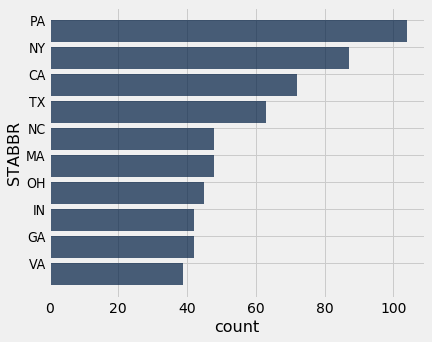

In [32]:
#Visualize categorical variables

colleges_per_state = scorecard.group("STABBR").sort("count", descending = True).take(np.arange(0,10))
colleges_per_state.barh("STABBR")

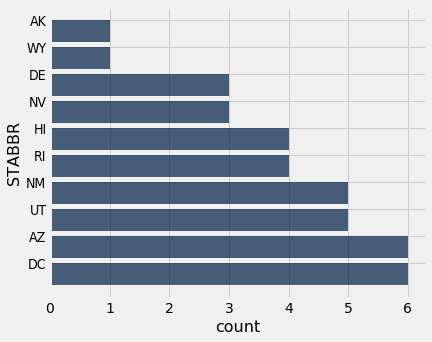

In [33]:
colleges_per_state = scorecard.group("STABBR").sort("count").take(np.arange(0,10))
colleges_per_state.barh("STABBR")

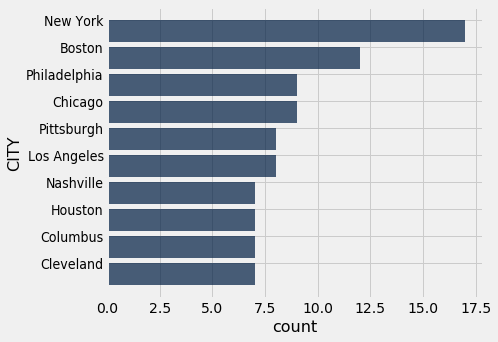

In [34]:
colleges_per_city = scorecard.group("CITY").sort("count", descending = True).take(np.arange(0,10))
colleges_per_city.barh("CITY")


**Short observational description**

1. Bar chart one shows the ten states with the highest number of colleges in raw numbers
2. Bar chart two shows the ten states with the lowest number of colleges in raw numbers
3. Bar chart three shows the ten cities with the highest number of colleges in raw numbers

While many of the states listed are simply those with the highest populations, this is not always the case. For instance, Florida, Illinois, and Michigan are all states with populations in the top ten that are not included while Massachussets, Indiana, and Virginia lie at 14, 16, and 12 respectively. Florida, with a population of almost 20 million (almost triple that of Indiana) is by far the most noticeable name missing. A possible explanation is that Florida has an older population. The city chart yields similar results with the exception of Pittsburgh and Cleveland which lie at 63 and 51 respectively. What this seems to imply is that in the general sense, locations with higher populations tend to have a greater number of colleges with some clear exceptions.

In [102]:
#Grouping or pivoting the data

SAT_AVG = scorecard.drop(0,1).group("STABBR", np.average)
SAT_AVG

STABBR,SATVR25 average,SATVR75 average,SATMT25 average,SATMT75 average
AK,500,610,450,555
AL,447.619,569.095,440.429,567.857
AR,441.562,542.188,466.75,565
AZ,472.5,604.167,478,595
CA,495.264,602.861,507.528,618.208
CO,483.071,592.286,484.5,595.857
CT,468.571,567.143,472.857,572.143
DC,539.167,639.167,539.167,637.5
DE,443.333,530,446.667,543.333
FL,478.237,580.263,471.053,572.526


**Short observational description**

This table shows the average 25 and 75 percentiles for both SAT reading and SAT math for all the schools in every single state. Taking a basic look at it there does seem to be some significant differences in the average SAT scores between states. I intend to use the info in this table in order to perform tests later in this exploration.

In [36]:
#Joining two tables

final_scorecard = SAT_AVG.join("STABBR", education, "State")
final_scorecard

STABBR,SATVR25 average,SATVR75 average,SATMT25 average,SATMT75 average,$ Per Student
AK,500,610,450,555,10419
AL,447.619,569.095,440.429,567.857,6327
AR,441.562,542.188,466.75,565,6676
AZ,472.5,604.167,478,595,6470
CA,495.264,602.861,507.528,618.208,7439
CO,483.071,592.286,484.5,595.857,7284
CT,468.571,567.143,472.857,572.143,11022
DC,539.167,639.167,539.167,637.5,14557
DE,443.333,530,446.667,543.333,9959
FL,478.237,580.263,471.053,572.526,6679


**Short observational description**

This table joins both of the tables that I have been playing with together, containing a row for each state that has the average SAT Math and Reading 25th and 75th percentile places. From a brief glance it looks like there may be an association betwen 2001-2002 spending per student on education and incoming SAT scores of students in 2015. With this table and a well run test I should be able to test for whether or not there is an association between these things.

**Hypothesis**
States that spend an above average amount of money on education per student in the year 2001-2002 will see different SAT Math scores for incoming students in the year 2015 than those with below average spending.

**Null Hypothesis**
Higher spending on education per student in the year 2001-2002 will have no relationship with SAT Math scores for incoming students in the year 2015.



In [37]:
#Statistical test for hypothesis

#First thing I will do is split up states into the higher spending groups and the lower spending groups with 75th percentile for math.
lower = final_scorecard.where("$ Per Student", are.below(np.average(final_scorecard.column("$ Per Student")))).select("SATMT75 average", "$ Per Student")
upper = final_scorecard.where("$ Per Student", are.above(np.average(final_scorecard.column("$ Per Student")))).select("SATMT75 average", "$ Per Student")
    

In [103]:
#Next I want to run a test where I create an array with the differences between the average score of the higher group and the lower group
statistics = make_array()
for i in np.arange(5000):
    bootstrap = lower.sample(40)
    bootstrap2 = upper.sample(40)
    sample_statistics = np.average(bootstrap2.column(0))-np.average(bootstrap.column(0))
    statistics = np.append(statistics, sample_statistics)

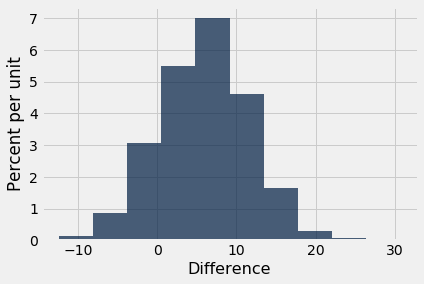

In [39]:
#Now for a quick fun visualization
Table().with_column("Difference", statistics).hist()

In [40]:
#Now to test if I can reject the null
lower_bound = percentile(2.5, statistics)
upper_bound = percentile(97.5, statistics)
print("Bootstrapped 95% confidence interval for the difference between Math scores of students attending scoles in higher spending states versus those in lower spending states: [{:f}, {:f}]".format(lower_bound, upper_bound))

Bootstrapped 95% confidence interval for the difference between Math scores of students attending scoles in higher spending states versus those in lower spending states: [-5.341988, 16.727289]


**Short conclusion**

Welp, I guess my hypothesis was wrong. I am unable to reject the null hypothesis. There doesn't appear to be a statistically significant difference between states that have higher spending per student and those that have lower spending per student. Going into this I thought that there would be a very clear association between how much states spent on students at a young age and how strong incoming college classes were for that state when they became of age years down the road. Many factors could cause this:

1. Not everyone takes the SAT. 
2. The average spending per student is just that, an average.
3. Not all schools are represented in this sample and the schools are not weighted by population when factoring for average SAT score.
4. Not everyone goes to schools in the states they grow up in nor does everyone live in the state they grow up in throughout their entire childhood.

There are a million other factors that may have affected this test, but the test is clear: States with higher spending on education per student do not see significantly increased SAT scores for incoming college students in their state years down the road.

**Describe a prediction problem**

My original intention when starting this project would have been to develop a regression function for predicting incoming SAT scores from spending per student, but given the results of my test, I am unsure if that is still worthwhile. Another interesting prediction that could be done is predicting the average upper bound reading score for a school given the lower bound math score. 
While a definitively far less interesting prediction than what I set out to do, it is still very cool to show that you can predict the 75th percentile Reading scores from a state given the 75th percentile Math scores from the same state. I plan on doing this by developing a regression function.


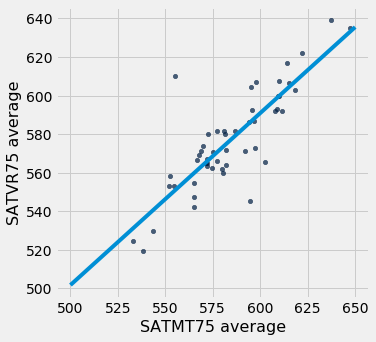

In [73]:
#Apply a prediction tehcnique

regression_table = final_scorecard.select("SATMT75 average", "SATVR75 average")

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)

def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

def reg_coeff(t):
    """Return the regression coefficient for columns 0 & 1."""
    t_su = standardize(t)
    return np.mean(t_su.column(0)*t_su.column(1))

def slope_of(t, r):
    """Return the slope of the regression line for t in original units.
    
    Assume that column 0 contains x values and column 1 contains y values.
    r is the regression coefficient for x and y.
    """
    return r*np.std(t.column(1))/np.std(t.column(0))

def intercept_of(t, r):
    """Return the slope of the regression line for t in original units."""
    s = slope_of(t, r)
    return s*(-np.mean(t.column(0))) + np.mean(t.column(1))

r = reg_coeff(regression_table)
slope = slope_of(regression_table, r)
intercept = intercept_of(regression_table, r)

def prediction(score):
    return slope*score + intercept

regression_table.scatter(0,1)
plots.plot([500, 650], [prediction(500), prediction(650)])

**Justify your approach**

I used a similar model that was used at the end of lab eight to develop a linear regression model for the data. The first step was to compute the regression coefficient, r, by taking the average of the standardized units of each column multiplied by each other. I then found the slope of the regression line and the intercept in the same way as in lab. Using all of this I was able to compute a regression formula that I could use to create a prediction function that I can now use to generate the predicted value of SATVR75 average for any SATMT25 average. The reason that I was able to do this was because the date is linear in nature. If the data were parabolic or logarithmic I would have had to run a more complicated regression. And, as shown on the graph I have created, the model I have generated fits the data very well. In the next part I will show quantitatively how accurate the model is.

In [74]:
#Evaluate the prediction technique quantitatively

regression_predictions = regression_table.with_column("predicted average", intercept + slope*regression_table.column(0))
regression_residuals = regression_predictions.with_column("residual", regression_predictions.column(2)-regression_predictions.column(1))
residuals = regression_residuals.column("residual")

In [75]:
np.average(residuals)

-2.6749844169792007e-14

In [76]:
np.std(residuals)

14.010602115757186

**Short conclusion**

With an effective average of zero and a standard deviation of 14, the model that has been created is extremely solid and has strong predictive qualities. This means that if somebody were to feed the average 75th percentile for math SAT in a state into this model it would likely spit out a prediction for the 75th percentile in reading that is quite accurate. That is actually really cool. While not the grandest statement of all time, what it does seem to suggest that there is a strong correlation between states that do well in math and states that do well in reading. While the efficacy of the SAT can be argued, this does seem to identify a strong disparity between different states and their academic strength. While that may not entirely be able to be chalked up to education spending as I was hoping to show at the beginning of this project, there is certainly still a difference that is quite significant.